In [1]:
#Auto-reload modules (used to develop functions outside this notebook)
%load_ext autoreload
%autoreload 2

In [20]:
from caiman.base.rois import register_multisession
from caiman.utils import visualization
from caiman.source_extraction.cnmf import cnmf as cnmf
from matplotlib import pyplot as plt
import numpy as np
import h5py
from labrotation import file_handling as fh
import pims_nd2

In [3]:
# Load multisession data (spatial components and mean intensity templates) (should be replaced by actual data)
file_path1 = fh.open_file("Choose result file #1 (hdf5)")
file_path2 = fh.open_file("Choose result file #2 (hdf5)")
#data = pickle.load(infile)


#spatial = data[0]
#templates = data[1]
#dims = templates[0].shape

In [19]:
# TODO: should be able to infer recordings from analysis parameters json file, right?
template_fpath1 = fh.open_file("Choose nd2 file #1")
template_fpath2 = fh.open_file("Choose nd2 file #2")

# Create templates from original files
### TODO: moco files would be nice... Run moco on subset?

In [26]:
nikon_movie1 = pims_nd2.ND2_Reader(template_fpath1)

array([[ 0.55273438,  0.95117188,  1.10742188, ..., 26.94140625,
        27.22070312, 26.59375   ],
       [ 2.89257812,  3.32617188,  4.63867188, ..., 26.6328125 ,
        26.78125   , 27.29101562],
       [ 2.35546875,  3.24609375,  4.59179688, ..., 27.49609375,
        27.92773438, 27.84765625],
       ...,
       [ 3.16601562,  4.25      ,  5.70898438, ..., 28.203125  ,
        27.13085938, 29.68554688],
       [ 3.25390625,  3.58789062,  4.83398438, ..., 28.24023438,
        27.97460938, 29.44140625],
       [ 3.14257812,  3.56445312,  5.33789062, ..., 28.23242188,
        27.60351562, 27.6328125 ]])

In [34]:
template1 = np.mean(nikon_movie1[:600], axis=0)

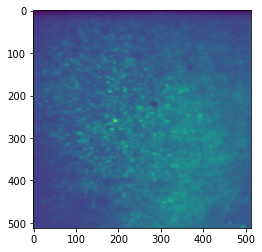

In [35]:
plt.imshow(template1)

### Movie 2.
ND2_Reader might be a singleton/static class, so deal with one object at a time.

In [36]:
nikon_movie2 = pims_nd2.ND2_Reader(template_fpath2)

In [37]:
template2 = np.mean(nikon_movie2[:600], axis=0)

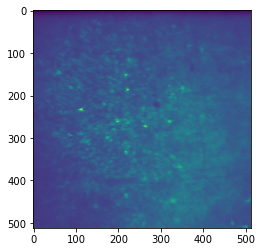

In [38]:
plt.imshow(template2)

In [5]:
cnmf_1 = cnmf.load_CNMF(file_path1, 'r')
cnmf_2 = cnmf.load_CNMF(file_path2, 'r')

In [42]:
templates = [template1, template2]

In [9]:
spatials = [cnmf_1.estimates.A, cnmf_2.estimates.A]
dims = cnmf_1.dims

In [39]:
spatial_union, assignments, matchings = register_multisession(A=spatials, dims=dims, templates=templates)

C:\Users\Bence\anaconda3\envs\2p-py\lib\site-packages\scipy\sparse\_index.py:125: SparseEfficiencyWarning: Changing the sparsity structure of a csc_matrix is expensive. lil_matrix is more efficient.
  self._set_arrayXarray(i, j, x)


In [46]:
# Filter components by number of sessions the component could be found

n_reg = 2  # minimal number of sessions that each component has to be registered in

# Use number of non-NaNs in each row to filter out components that were not registered in enough sessions
assignments_filtered = np.array(np.nan_to_num(assignments[np.sum(~np.isnan(assignments), axis=1) >= n_reg]), dtype=int);

# Use filtered indices to select the corresponding spatial components
spatial_filtered = spatials[0][:, assignments_filtered[:, 0]]

# Plot spatial components of the selected components on the template of the last session
visualization.nb_plot_contour( templates[-1], spatial_filtered, 512, 512);

In [54]:
# Filter components by number of sessions the component could be found

n_reg = 2  # minimal number of sessions that each component has to be registered in

# Use number of non-NaNs in each row to filter out components that were not registered in enough sessions
assignments_filtered = np.array(np.nan_to_num(assignments[np.sum(~np.isnan(assignments), axis=1) >= n_reg]), dtype=int);

# Use filtered indices to select the corresponding spatial components
spatial_filtered = spatials[0][:, assignments_filtered[:, 0]]

# Plot spatial components of the selected components on the template of the last session
visualization.nb_plot_contour( templates[-1], spatial_filtered, 512, 512);

In [49]:
assignments_filtered.shape

(573, 2)

In [51]:
assignments.shape

(1111, 2)

In [52]:
visualization.nb_plot_contour( templates[0], spatials[0], 512, 512);

In [53]:
visualization.nb_plot_contour( templates[1], spatials[1], 512, 512);